# Setup

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
# Load the data
df = pd.read_csv('./data/bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

In [61]:
# Exmaple of changing the date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Set Date to be the index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [62]:
# Select the data
df.loc['2017-01-01':'2017-1-7']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000
2017-01-07,903.487000,908.585022,823.556030,908.585022,908.585022,279550016


In [63]:
# Load and set index
df = pd.read_csv('./data/bitcoin_price.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Resample Data

In [64]:
# Resample the data to weekly, and take the mean
df.resample('W').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07


# Explore Data

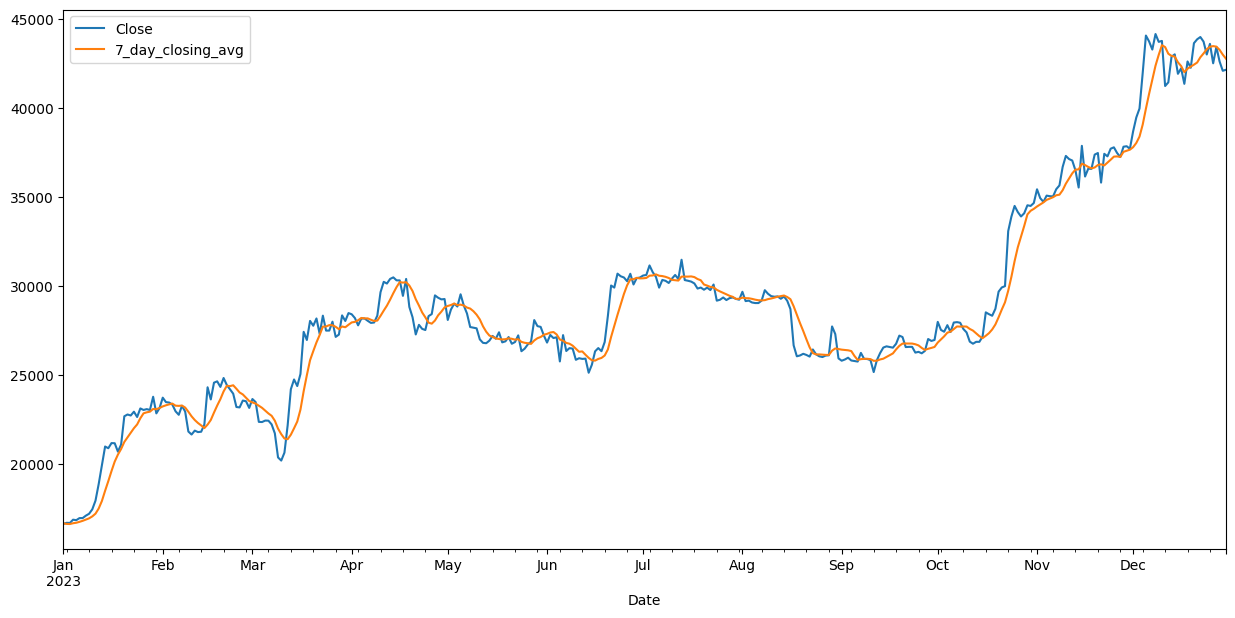

In [65]:
# 7-day rolling average for close price
# rolling average of window 7 means that the average is calculated for the current day and the 6 days before it
df['7_day_closing_avg'] = df['Close'].rolling(window=7).mean()
df[['Close', '7_day_closing_avg']].loc['2023'].plot(figsize=(15, 7))
plt.show()

In [66]:
# Find the month with the highest average closing price
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

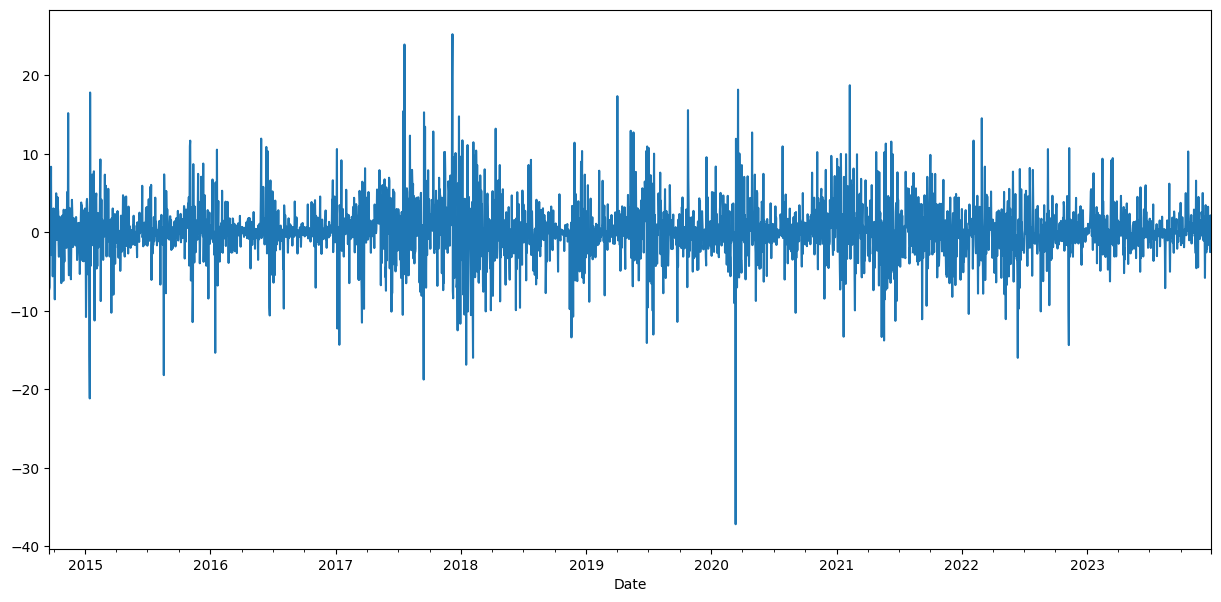

In [67]:
# Compute percentage change
df['change'] = df['Close'].pct_change().mul(100)
df.head()

# Plot the percentage change
df['change'].plot(figsize=(15, 7))
plt.show()

In [68]:
# Select change that is greater than 10%
df[abs(df['change']) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,change
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


# Data Visualization

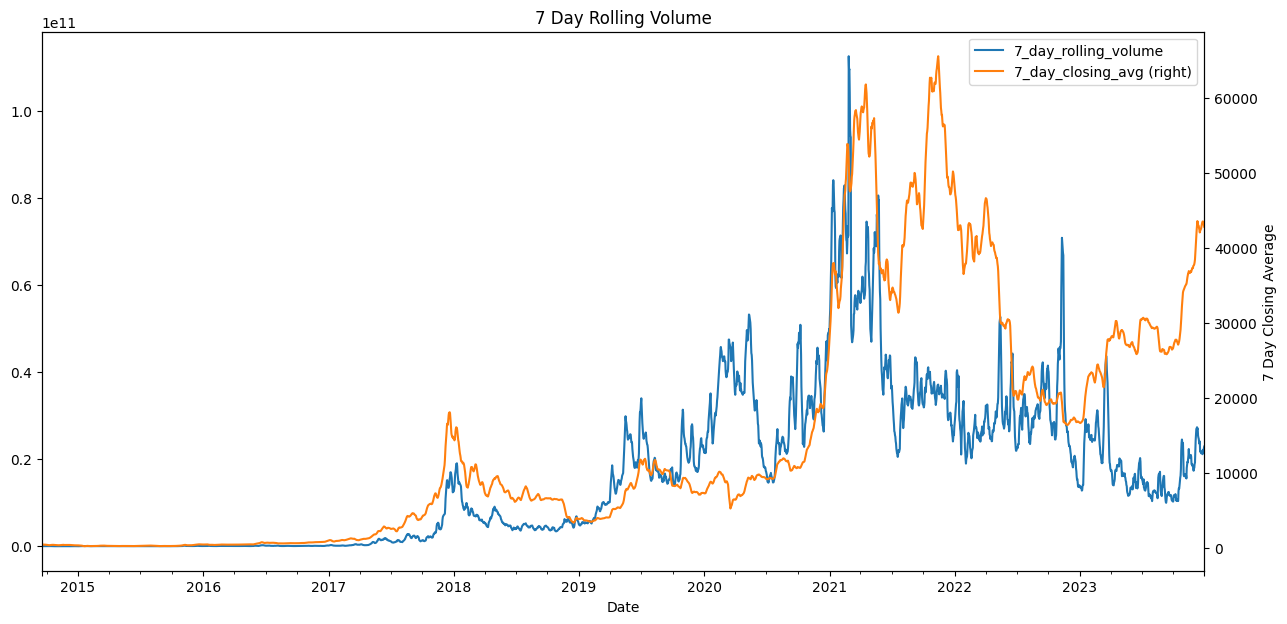

In [69]:
# plot 2 graphs on the same plot
df['7_day_rolling_volume'] = df['Volume'].rolling(window=7).mean()
df['7_day_rolling_volume'].plot(title="7 Day Rolling Volume", figsize=(15, 7), legend=True)
ax = df['7_day_closing_avg'].plot(legend=True, secondary_y=True)
ax.set_ylabel('7 Day Closing Average')
plt.show()

In [70]:
# Plot the correlation between the closing price and the volume
# df['7_day_rolling_volume'].corr(df['7_day_closing_avg'])
df[['7_day_rolling_volume', '7_day_closing_avg']].corr()

,7_day_rolling_volume,7_day_closing_avg
7_day_rolling_volume,1.000000,0.729538
7_day_closing_avg,0.729538,1.000000


# Data Manipulation

In [71]:
# Search for missing values
df.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
7_day_closing_avg       6
change                  1
7_day_rolling_volume    6
dtype: int64

In [72]:
# Fill missing values

# Fill with next observations(backward fill)
# df['7_day_closing_avg'].fillna(method='bfill', inplace=True)
df['7_day_closing_avg'].bfill(inplace=True)
# df['7_day_closing_avg'].head()

# Fill with Interpolate Values(needs both sides to exist)
# df['7_day_rolling_volume'].interpolate(method='linear',inplace=True)
# df['7_day_rolling_volume'].head()
df.bfill(inplace=True)

df.isnull().sum()


Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
7_day_closing_avg       0
change                  0
7_day_rolling_volume    0
dtype: int64

In [73]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['weekday'] = df.index.day_name()
df['is_weekend'] = df['day_of_week'].isin([5, 6])
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,change,7_day_rolling_volume,year,month,day,day_of_week,weekday,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,417.462572,-7.192558,3.230436e+07,2014,9,17,2,Wednesday,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,417.462572,-7.192558,3.230436e+07,2014,9,18,3,Thursday,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,417.462572,-6.984265,3.230436e+07,2014,9,19,4,Friday,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,417.462572,3.573492,3.230436e+07,2014,9,20,5,Saturday,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,417.462572,-2.465854,3.230436e+07,2014,9,21,6,Sunday,True
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,417.462572,0.835210,3.230436e+07,2014,9,22,0,Monday,False
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,417.462572,8.364742,3.230436e+07,2014,9,23,1,Tuesday,False


# Feature Engineering



In [74]:
# Lagged Variables
# Lagged variables are the variables that are shifted by a certain number of periods
# This may be useful when some result is likely impacted by previous data.
df['lagged_close'] = df['Close'].shift(1)
df['lagged_close'].head()

Date
2014-09-17           NaN
2014-09-18    457.334015
2014-09-19    424.440002
2014-09-20    394.795990
2014-09-21    408.903992
Name: lagged_close, dtype: float64

# Seasonality

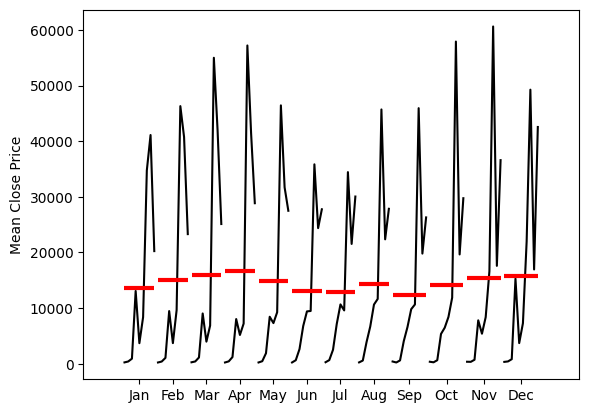

In [75]:
# Monthly seasonality
month_plot(df['Close'].resample('ME').mean(), ylabel='Mean Close Price')
plt.show()

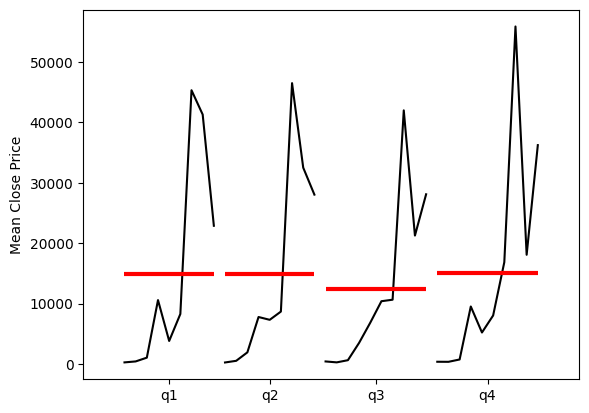

In [76]:
# Quarterly seasonality
quarter_plot(df['Close'].resample('QE').mean(), ylabel='Mean Close Price')
plt.show()

In [77]:
# Import chocolate data
chocolate = pd.read_csv('./data/choco_monthly_revenue.csv', index_col='Month with Year', parse_dates=True)
chocolate.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


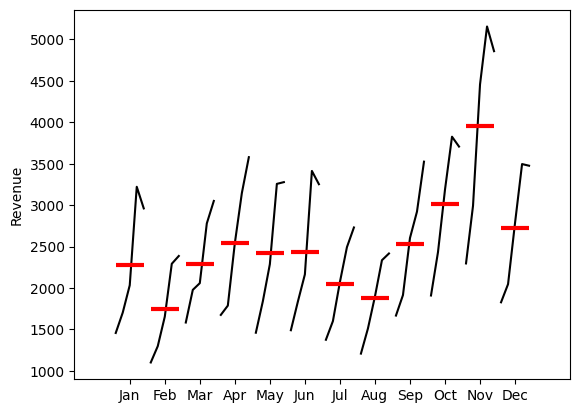

In [78]:
# monthly seasonality
month_plot(chocolate['revenue'], ylabel='Revenue')
plt.show()

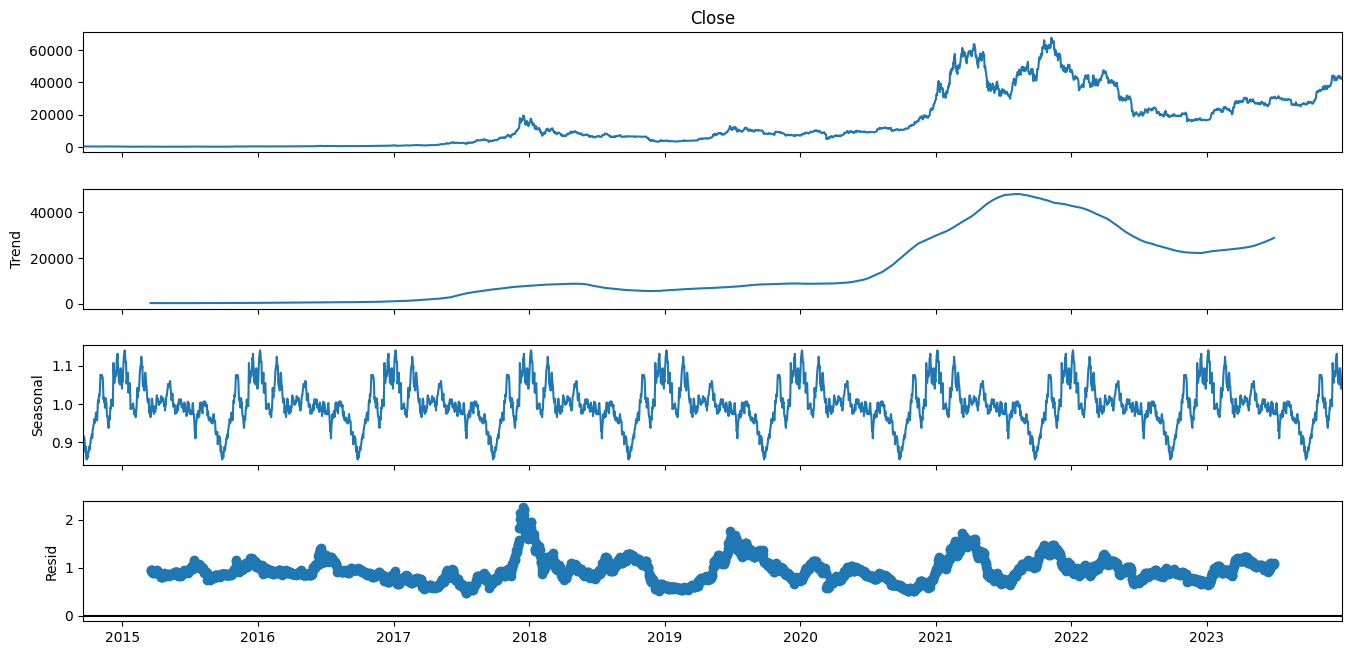

In [79]:
# Sesonal Decomposition(multiplicative)
# Trend: The long-term movement in the data.
# Seasonal: The repeating patterns or cycles (e.g., monthly or yearly seasonality).
# Residual: The remaining noise or irregular component after removing trend and seasonality.
decompositionMul = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = decompositionMul.plot()
fig.set_size_inches(15, 7)
plt.show()

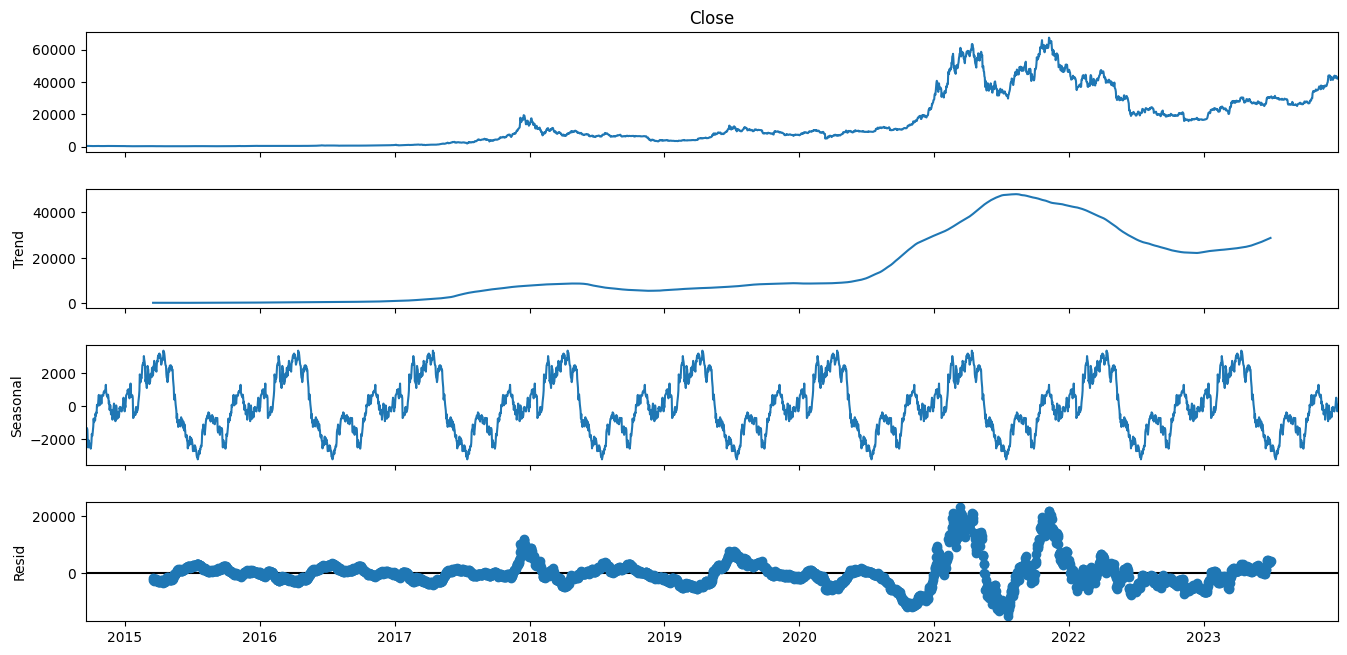

In [80]:
# Sesonal Decomposition(additive)
decompositionAdd = seasonal_decompose(df['Close'], model='additive', period=365)
fig = decompositionAdd.plot()
fig.set_size_inches(15, 7)
plt.show()

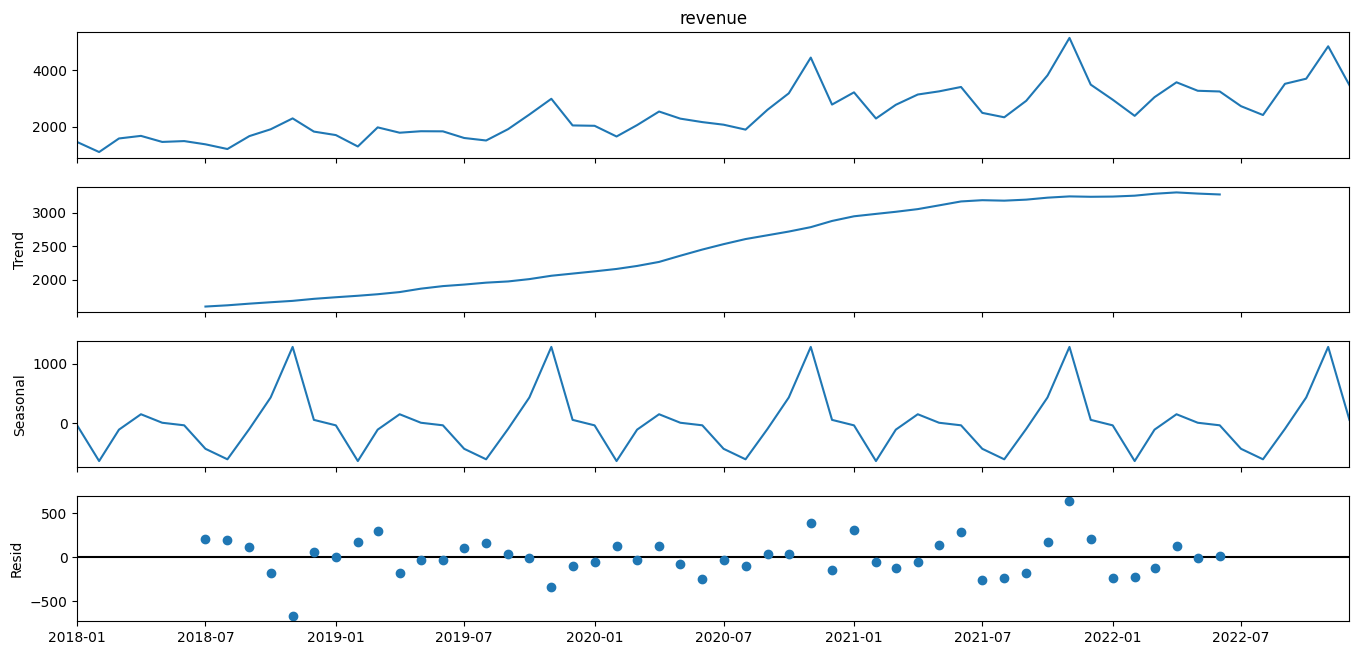

In [81]:
# Chocolate data Seasonal Decomposition(additive)
decompositionAdd = seasonal_decompose(chocolate['revenue'], model='additive', period=12)
fig = decompositionAdd.plot()
fig.set_size_inches(15, 7)
plt.show()

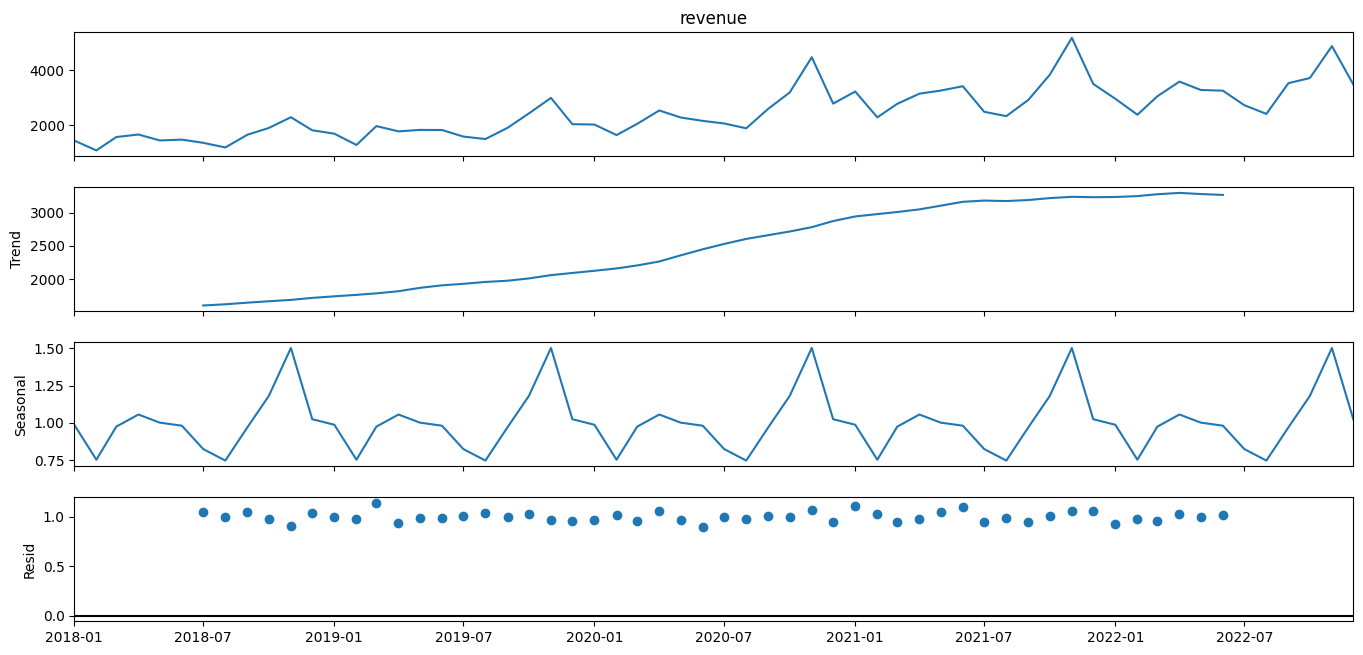

In [82]:
# Chocolate data Seasonal Decomposition(multiplicative)
decompositionMul = seasonal_decompose(chocolate['revenue'], model='multiplicative', period=12)
fig = decompositionMul.plot()
fig.set_size_inches(15, 7)
plt.show()